In [21]:
import numpy as np
from keras import models
from keras import layers
from keras.layers import Dense,Conv2D,Flatten
from keras.callbacks import History
from keras.models import model_from_json
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import model_from_json, Sequential
from keras.optimizers import SGD
import keras.backend as K

In [2]:
(train_images,train_labels),(test_images,test_labels)= mnist.load_data()

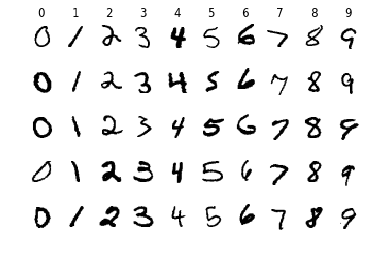

In [3]:
#The images are labeled as 10 classes. Which are enumerated as follows 
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Printing 5 random examples from training images of each class
num_classes = len(classes)
samples_per_class = 5
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(train_labels==y)
    idxs = np.random.choice(idxs,samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(train_images[idx],cmap=plt.cm.binary)
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [4]:
print("Size of the images in the dataset: " + str(train_images.shape[1:3]) + "\n")
print("Number of train images: "+ str(train_images.shape[0]))
print("Number of test images: "+ str(test_images.shape[0]) + "\n")
print("Shape of train image data: "+ str(train_images.shape))
print("Shape of test image data: "+ str(test_images.shape) + "\n")
print("Train labels :" + str(train_labels))
print("Test labels :" + str(test_labels))

Size of the images in the dataset: (28, 28)

Number of train images: 60000
Number of test images: 10000

Shape of train image data: (60000, 28, 28)
Shape of test image data: (10000, 28, 28)

Train labels :[5 0 4 ... 5 6 8]
Test labels :[7 2 1 ... 4 5 6]


In [5]:
#Visualization of an Image in the Train dataset 
#This is how an image is saved in the dataset
index=9 # The image you want to see

print(train_images[index])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0 189 190   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0 143 247 153   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 136 247 242  86   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 192 252 187   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  62 185  18   

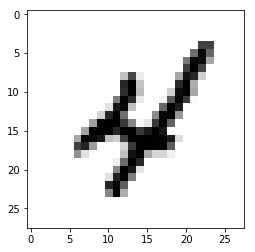

Given Label:4


In [6]:
#Visualization of the same image
plt.imshow(train_images[index],cmap=plt.cm.binary)
plt.show()

print (("Given Label:") + str(train_labels[index]))

First we train a model using neural networks. We will use one hidden layer with 512 neurons and relu activation.
We use softmax to predict final output. Here we are using adam optimizer.

In [7]:
network=models.Sequential()
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))
network.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [8]:
#Preparing the data
#Reshaping 
train_images=train_images.reshape((60000,28*28))
test_images=test_images.reshape((10000,28*28))
print (train_images.shape)
print (test_images.shape)

#Normalising
train_images=train_images.astype('float32')/255
test_images=test_images.astype('float32')/255

(60000, 784)
(10000, 784)


In [9]:
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)


In [10]:
h=network.fit(train_images,train_labels,validation_data=(test_images,test_labels),epochs=6,batch_size=128)


Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 6s 108us/step - loss: 0.2628 - acc: 0.9259 - val_loss: 0.1310 - val_acc: 0.9605
Epoch 2/6
60000/60000 [==============================] - 7s 111us/step - loss: 0.1070 - acc: 0.9691 - val_loss: 0.0937 - val_acc: 0.9707
Epoch 3/6
60000/60000 [==============================] - 6s 97us/step - loss: 0.0707 - acc: 0.9792 - val_loss: 0.0773 - val_acc: 0.9761
Epoch 4/6
60000/60000 [==============================] - 6s 97us/step - loss: 0.0507 - acc: 0.9849 - val_loss: 0.0694 - val_acc: 0.9783
Epoch 5/6
60000/60000 [==============================] - 7s 115us/step - loss: 0.0371 - acc: 0.9891 - val_loss: 0.0661 - val_acc: 0.9795
Epoch 6/6
60000/60000 [==============================] - 7s 111us/step - loss: 0.0280 - acc: 0.9920 - val_loss: 0.0625 - val_acc: 0.9808


In [11]:
#Save the model

# serialize model to JSON
model_json = network.to_json()
with open("mnist_network.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
network.save_weights("mnist_network.h5")
print("Saved model to drive")

Saved model to drive


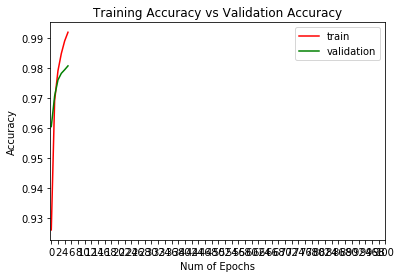

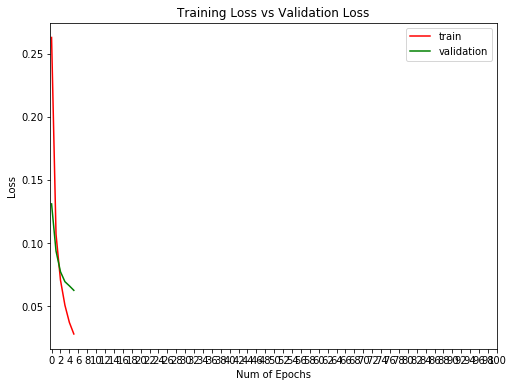

In [12]:
plt.figure(0)
plt.plot(h.history['acc'],'r')
plt.plot(h.history['val_acc'],'g')
plt.xticks(np.arange(0, 101, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
 
plt.figure(1)
plt.plot(h.history['loss'],'r')
plt.plot(h.history['val_loss'],'g')
plt.xticks(np.arange(0, 101, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
 
 
plt.show()

We see that our model has learnt quite well. So, MNIST dataset is one of the instances where simple NN works ok with test accuracy of about 98%. Now we implement same using a CNN model which are better classifier techniques for image.

In [15]:
(train_x, train_y) , (test_x, test_y) = mnist.load_data()

In [16]:
img_rows, img_cols = 28, 28

In [17]:
if K.image_data_format() == "channels_first":
    train_x = train_x.reshape(train_x.shape[0], 1, img_rows, img_cols)
    test_x = test_x.reshape(test_x.shape[0], 1,  img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)

else:
    train_x = train_x.reshape(train_x.shape[0],img_rows, img_cols, 1)
    test_x = test_x.reshape(test_x.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [18]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [19]:
train_y = keras.utils.to_categorical(train_y,10)
test_y = keras.utils.to_categorical(test_y,10)

In [23]:
model = Sequential()
model.add(Conv2D(filters=128,kernel_size=[3,3],activation="relu",input_shape=input_shape))
model.compile(optimizer=SGD(0.001),loss="categorical_crossentropy",metrics=["accuracy"])
model.fit(train_x, train_y, batch_size=64, epochs=1, validation_data=(test_x, test_y), shuffle=True)
model.add(Conv2D(filters=128,kernel_size=[3,3],activation="relu"))
#model.add(Conv2D(filters=128,kernel_size=[3,3],activation="relu"))
#model.add(Conv2D(filters=128,kernel_size=[3,3],activation="relu"))
#model.add(Conv2D(filters=128,kernel_size=[3,3],activation="relu"))
model.add(Flatten())
model.add(Dense(units=10,activation="softmax"))

In [24]:
model.compile(optimizer=SGD(0.001),loss="categorical_crossentropy",metrics=["accuracy"])
model.fit(train_x, train_y, batch_size=64, epochs=1, validation_data=(test_x, test_y), shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 1083s 18ms/step - loss: 4.3355 - acc: 0.7005 - val_loss: 0.1140 - val_acc: 0.9642


I have implemented a CNN with 2 convolutional layers both with 128 filters with kernel size 3*3 .Then I have added a dense layer and 
10 way softmax into the different digits.In just one epoch throughout the training data with batch size of 64 we get 96.4% of test accuracy. Though the time taken here is much more but if we continue training we find that we can get much better test accuracy.